<h1 style="text-align:center; color:#FF5A26; font-weight:bold;">Telco Customer Churn</h1>

- [Dataset Description](#1)
- [Research Questions](#5)
- [Import Libraries and Data](#2)
- [Data preparation & EDA](#3)
- [Conclusions](#4)
- [Proposed Solutions](#6)
- [PreProcessing Stage](#7)
- [Modeling](#8)
****

<a id=1></a>
# Dataset Description: 

## [Dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

**Each `row` represents a customer, each `column` contains customer’s attributes described on the column Metadata.**

- `Customer ID` : 7043 customers entered the system.
- `Gender ` : Whether the customer is a male or a female.
- `SeniorCitizen` :  Whether the customer is a senior citizen(is generally of an older age) or not (1, 0).
- `Partner` : Whether the customer has a partner or not (Yes, No).
- `Dependents` : Whether the customer has dependents or not (Yes, No).
- `Tenture` : Number of months the customer has stayed with the company.
- `PhoneService` : Whether the customer has a phone service or not (Yes, No).
- `MultipleLines` : Whether the customer has multiple lines or not (Yes, No, No phone service).
- `InternetService` : Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity` : Whether the customer has online security or not (Yes, No, No internet service).
- `OnlineBackup` : Whether the customer has online backup or not (Yes, No, No internet service).
- `DeviceProtection` : Whether the customer has device protection or not (Yes, No, No internet service).
- `TechSupport` : Whether the customer has tech support or not (Yes, No, No internet service).
- `StreamingTV` : Whether the customer has streaming TV or not (Yes, No, No internet service).
- `StreamingMovies` : Whether the customer has streaming movies or not (Yes, No, No internet service).
- `Contract` : The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling` : Whether the customer has paperless billing or not (Yes, No).
- `PaymentMethod` : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges` : The amount charged to the customer monthly.
- `TotalCharges` : The total amount charged to the customer.
- `Churn` : Customers who left within the last month.

<a id=5></a>
# Research Questions

- [Churn Rate:](#Q1)

  * What is the overall churn rate in our customer base?
  
- [Demographic info about customers:](#Q2)

  * What is the gender ratio among our customers?
  * What percentage of customers who left the company are male, and what percentage are female?
  * What is the percentage variance in age across the customer base?
  * Among senior citizens, what percentage left the company, and what percentage did not?
  * What is the relationship between the Senior Citizens and the monthly charging rate?
  * What is the ratio of customers with partners to those without partners?
  * What are the percentages of customers with partners who left the company versus those who did not?
  * What is the ratio of customers with dependents to those without dependents?
  * What is the percentage of customers with dependents who left the company compared to those who stayed?
  * Is there a significant relationship between the monthly charge and having dependents?
  
- [Customer Services:](#Q3)

  * What is the ratio of customers with internet service to those without?
  * What is the relationship between different internet service types and the churn rate?
  * How about the internet service and Monthly Charges ?
  * How many Internet Services we provide in our company?
  * How many customers use StreamingTV?
  * What is the ratio of customers who stream movies to StreamingTV subscribers?
  * What is the percentage of customers with phone service?
  * What is the percentage of customers with no phone service who left compared to those who have?
  * What is the ratio between those who have MultipleLines and not in our company?
  
  
- [Customer Account Info:](#Q4)

  * What percentage of customers left within the first 72 months?
  * How do different contract types distribute among our customer base?
  * How does the churn rate differ based on contract types?
  * How many customers use paperless billing?
  * Does choosing paperless billing affect the churn rate?
  * What is the count or distribution of payment methods used by customers?
  * How does the churn rate vary based on different payment methods?
  * Which variables have a strong relationship with each other depending on the correlation matrix?
  * How is the tenure (number of months customers have stayed with the company) correlated with total charges?
  * What is the average monthly charge?
  * What is the relationship between monthly and total customer charges?
  * Who are the top 10 most valuable customers based on monthly and total charges?


<a id=2></a>
# Import Libraries and Data:

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd     # for dataframe
import numpy as np      # for Mathmatical Operations
# for Plotting
import seaborn as sns            
import matplotlib.pyplot as plt
import plotly.express as px

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**We notice from the cell above that there aren't any missing value but we can't know for sure because the TotalCharges should be a float but it is a string so we must convert it to float first**

In [6]:
# number of missing values for each columns
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Converting data type for total charge column to float 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check the new data type of the column
df['TotalCharges'].dtype

dtype('float64')

In [8]:
df.duplicated().sum()

0

In [9]:
# number of missing values for each columns
df.isna().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# drop them
df.dropna(axis=0,inplace=True)

In [11]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
#df=df.drop('customerID',axis=1)
#df.head()

<a id=3></a>
# Data preparation & EDA: 

### How many clients left the company last month?

In [14]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

No     5163
Yes    1869
Name: Churn, dtype: int64


<a id=Q1></a>
# Churn Rate: 

### What is the overall churn rate in our customer base?

In [15]:

def generate_pie_chart(data, column, title, colors):
    """
    Generate an interactive Plotly pie chart.
    
    Args:
        data (DataFrame): The DataFrame containing the data.
        column (str): The column to be used for generating the pie chart.
        title (str): The title of the pie chart.
        colors (list): List of custom colors for the pie chart.
    """
    column_counts = data[column].value_counts()

    fig = px.pie(
        values=column_counts.values, 
        names=column_counts.index, 
        title=title,
        color_discrete_sequence=colors
    )

    fig.update_traces(textinfo='percent+label', pull=[0.01,0.01],
                      textfont=dict(size=18))  # Increase font size

    fig.update_layout(showlegend=True,
                      title_font=dict(size=22),  # Increase title font size
                      width=800,  # Adjust the width of the figure
                      height=600)  # Adjust the height of the figure
    
    fig.show()


In [16]:
custom_colors = ["#FF5A26", "#292929"]
generate_pie_chart(df, 'Churn', "Percentage of clients who left and who's still in the company", custom_colors)

**Over `25%` of clients left the company😮**

<a id=Q2></a>
# Demographic info about customers: 

### How many customers of each gender are currently in the company?

In [17]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

Male      3549
Female    3483
Name: gender, dtype: int64


### What is the gender ratio among our customers?

In [18]:
custom_colors = ["#1E90FF", "#FF1493"]
generate_pie_chart(df, 'gender', "Percentage of each gender in the company", custom_colors)


**The company has an approximately equal number of genders.**

### What percentage of customers who left the company are male, and what percentage are female?

In [19]:
def calculate_percentage_cross_tab(df, x):
    # Create the cross-tabulation
    cross_tab = pd.crosstab(df[x], df['Churn'])
    
    # Convert counts to percentages
    percentage_cross_tab = cross_tab.apply(lambda row: row / row.sum() * 100, axis=1)
    
    # Round the percentages to two decimal places
    rounded_percentage_cross_tab = percentage_cross_tab.round(2)
    
    return rounded_percentage_cross_tab


In [20]:
def plott(x, y, df):
    # Group by 'x' and 'Churn' columns and calculate counts and percentages
    grouped = df.groupby([x, 'Churn']).size().reset_index(name='Count')
    grouped['Percentage'] = (grouped['Count'] / grouped.groupby(x)['Count'].transform('sum') * 100).round(2)

    # Create Plotly grouped bar chart with custom color scheme and larger font size
    colors = ['#FF5A26', '#292929']  # Custom color scheme

    fig = px.bar(
        grouped, 
        x=x, 
        y='Percentage', 
        color='Churn',
        title=x + ' vs ' + y + ' (%)',
        labels={'Percentage': 'Percentage', x: x},
        color_discrete_sequence=colors,
        barmode='group'  # Set the bar mode to grouped
    )
    
    fig.update_layout(
        xaxis_title=x,
        yaxis_title='Percentage',
        showlegend=True,
        font=dict(size=18)  # Set the font size here
    )

    fig.show()

In [21]:
calculate_percentage_cross_tab(df, 'gender')

Churn,No,Yes
gender,,
Female,73.04,26.96
Male,73.80,26.20


In [22]:
churn_gender_counts = df.groupby(['Churn', 'gender']).size().reset_index(name='Count')

# Calculate percentages
churn_gender_counts['Percentage'] = churn_gender_counts['Count'] / churn_gender_counts['Count'].sum() * 100

fig = px.sunburst(churn_gender_counts, 
                  path=['Churn', 'gender'], 
                  values='Count', 
                  title="Churn Status with Gender Sunburst Chart",
                  color='Churn', 
                  color_discrete_sequence=['#FF5A26', '#292929'],
                  labels={'Churn': 'Status'},
                  custom_data=['Percentage'])

fig.update_layout(title_font=dict(size=20), 
                  width=800, height=600)

fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata[0]:.2f}%')

fig.show()


**Gender almost didn't affect on Churn.**

### How many clients are considered senior citizens?

In [23]:
SeniorCitizen_counts = df['SeniorCitizen'].value_counts()
print(SeniorCitizen_counts)

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


### What is the percentage variance in age across the customer base?

In [24]:
custom_colors = ['#FF5A26', '#292929']
generate_pie_chart(df, 'SeniorCitizen', "Percentage of variation in ages in the company", custom_colors)


**`16.2%` of the company's clients are elderly and the rest are young.**

### Among senior citizens, what percentage left the company, and what percentage did not?

In [25]:
calculate_percentage_cross_tab(df, 'SeniorCitizen')

Churn,No,Yes
SeniorCitizen,,
0,76.35,23.65
1,58.32,41.68


In [26]:
plott('SeniorCitizen','Churn',df)

**Over `40%` of senior citizens left the company.**

### What is the relationship between the Senior Citizens and the monthly charging rate?

In [27]:
fig = px.box(df, 
             x='SeniorCitizen', 
             y='MonthlyCharges', 
             labels={'SeniorCitizen': 'Senior Citizen', 'MonthlyCharges': 'Monthly Charges'},
             title='Box Plot of Monthly Charges by Senior Citizen',
             color='SeniorCitizen') # Assign colors based on 'InternetService' column

fig.update_layout(title_font=dict(size=24),  # Title font size
                  xaxis=dict(title_font=dict(size=18)),  # X-axis label font size
                  yaxis=dict(title_font=dict(size=18)),  # Y-axis label font size
                  width=800, height=600)

fig.show()

**Evidently, the elderly demographic exhibits higher billing patterns, suggesting the potential benefits of introducing tiered pricing plans aligned with their specific usage behaviors. This strategic approach ensures that they perceive their payments as reflective of their actual usage, fostering a sense of value and fairness in the services they receive.**

### How many customers have partners?

In [28]:
Partner_counts = df['Partner'].value_counts()
print(Partner_counts)

No     3639
Yes    3393
Name: Partner, dtype: int64


### What is the ratio of customers with partners to those without partners?

In [29]:
custom_colors = ['#FFE908', '#292929']
generate_pie_chart(df, 'Partner', "Percentage of having a partner VS those who do not have", custom_colors)

**`51.7%` of clients don't have a partner.**

### What are the percentages of customers with partners who left the company versus those who did not?

In [30]:
calculate_percentage_cross_tab(df, 'Partner')

Churn,No,Yes
Partner,,
No,67.02,32.98
Yes,80.28,19.72


In [31]:
plott('Partner','Churn',df)

**Over `30%` of clients with no partner left the company.**

### How many customers have dependents?

In [32]:
Dependents_counts = df['Dependents'].value_counts()
print(Dependents_counts)

No     4933
Yes    2099
Name: Dependents, dtype: int64


### What is the ratio of customers with dependents to those without dependents?

In [33]:
custom_colors = ["#636EFA", "#EF553B"]
generate_pie_chart(df, 'Dependents', "Percentage of Dependent clients in the company VS Independent clients", custom_colors)

**`70.2%` of clients are Independent.**


### What is the percentage of customers with dependents who left the company compared to those who stayed?

In [34]:
calculate_percentage_cross_tab(df, 'Dependents')

Churn,No,Yes
Dependents,,
No,68.72,31.28
Yes,84.47,15.53


In [35]:
plott('Dependents','Churn',df)

**Around `31%` of independent clients left the company.**

### Is there a significant relationship between the monthly charge and having dependents?

In [36]:
fig = px.box(df, x='Dependents', y='MonthlyCharges',
             color='Dependents',  # Assign colors based on 'Dependents' column
             labels={'Dependents': 'Dependents', 'MonthlyCharges': 'Monthly Charges'},
             title='Monthly Charges vs. Dependents')

fig.show()


**Undoubtedly, a strong correlation is evident between these two variables. This revelation sheds light on the primary factor driving independent clients to leave the company—namely, their substantial monthly expenditures.**

<a id=Q3></a>
# Customer Services

### How many customers have internet service?

In [37]:
InternetService_counts = df['InternetService'].value_counts()
print(InternetService_counts)

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


### What is the ratio of customers with internet service to those without?

In [38]:
custom_colors = [ '#292929', '#FFE908', '#FF9B00']
generate_pie_chart(df, 'InternetService', "Percentage of Internet Service Types in the company", custom_colors)

**`44%`uses Fiber optic, `34.4%` uses DSL and `21.6%` has no Internet Service**

### What is the relationship between different internet service types and the churn rate?

In [39]:
calculate_percentage_cross_tab(df, 'InternetService')

Churn,No,Yes
InternetService,,
DSL,81.00,19.00
Fiber optic,58.11,41.89
No,92.57,7.43


In [40]:
plott('InternetService','Churn',df)

**`41.8%` of customers using Fiber Optic have left the company**

### How about the internet service and Monthly Charges ?

In [41]:
fig = px.box(df, 
             x='InternetService', 
             y='MonthlyCharges', 
             labels={'InternetService': 'Internet Service', 'MonthlyCharges': 'Monthly Charges'},
             title='Box Plot of Monthly Charges by Internet Service',
             color='InternetService',  # Assign colors based on 'InternetService' column
             color_discrete_sequence=['#FF9B00', '#FF4040', '#8B4500'])  # Set color scheme

fig.update_layout(title_font=dict(size=24),  # Title font size
                  xaxis=dict(title_font=dict(size=18)),  # X-axis label font size
                  yaxis=dict(title_font=dict(size=18)),  # Y-axis label font size
                  width=800, height=600)

fig.show()

**The exorbitant costs of fiberoptic services appear to be a significant factor leading to the departure of a substantial number of customers from the company.**

### How many Internet Services we provide in our company?

In [42]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
plott('OnlineSecurity', 'Churn', df)
plott('OnlineBackup', 'Churn', df)
plott('DeviceProtection', 'Churn', df)
plott('TechSupport', 'Churn', df)
plott('StreamingTV', 'Churn', df)
plott('StreamingMovies', 'Churn', df)

**`40%`of Clients who do not have `online security`,`online Backup`,`DeviceProtection`,`TechSupport` leave the company and both streaming movies and Tv don't affect Churn**


### How many customers use StreamingTV?

In [44]:
 StreamingTV_counts = df['StreamingTV'].value_counts()
print( StreamingTV_counts)

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


In [45]:
custom_colors = ['#FF5A26', '#FFE908', '#292929']
generate_pie_chart(df, 'StreamingTV', "Percentage of clients uses  Streaming TV", custom_colors)

### What is the ratio of customers who stream movies to StreamingTV subscribers?

In [46]:
# Calculate the number of users with streaming movies
streaming_movies_users = df[df['StreamingMovies'] == 'Yes']['StreamingMovies'].count()

# Calculate the number of StreamingTV subscribers
streaming_tv_subscribers = df[df['StreamingTV'] == 'Yes']['StreamingTV'].count()

# Calculate the ratio
ratio = streaming_movies_users / streaming_tv_subscribers

print("The ratio between users with Streaming Movies to StreamingTV subscribers is:", ratio)

The ratio between users with Streaming Movies to StreamingTV subscribers is: 1.0103588605253422


In [47]:
# Calculate the number of users with streaming movies
streaming_movies_users = df[df['StreamingMovies'] == 'Yes']['StreamingMovies'].count()

# Calculate the number of StreamingTV subscribers
streaming_tv_subscribers = df[df['StreamingTV'] == 'Yes']['StreamingTV'].count()

# Create a DataFrame for the data
data = {
    'User Type': ['Streaming Movies Users', 'Streaming TV Subscribers'],
    'Count': [streaming_movies_users, streaming_tv_subscribers]
}
df_plot = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(
    df_plot,
    x='User Type',
    y='Count',
    color='User Type',
    labels={'Count': 'Number of Users'},
    title='Ratio of Users with Streaming Movies to Streaming TV Subscribers'
)

fig.show()

# '#FFE908', '#292929'

In [48]:
# Count the number of customers with both StreamingTV and StreamingMovies services
customers_with_both = df[(df['StreamingTV'] == 'Yes') & (df['StreamingMovies'] == 'Yes')].shape[0]
customers_with_both

1939

**The number of users who stream movies compared to those who stream TV shows is nearly equal. Additionally, most users enjoy both streaming TV shows and streaming movies.**

### How many customers have phone service?

In [49]:
PhoneService_counts = df['PhoneService'].value_counts()
print(PhoneService_counts)

Yes    6352
No      680
Name: PhoneService, dtype: int64


### What is the percentage of customers with phone service?

In [50]:
custom_colors = ['#FF9B00', '#292929']
generate_pie_chart(df, 'PhoneService', "Percentage of clients have Phone Service", custom_colors)

**`90.3%` who have phone service.**

### What is the percentage of customers with no phone service who left compared to those who have?

In [51]:
calculate_percentage_cross_tab(df, 'PhoneService')

Churn,No,Yes
PhoneService,,
No,75.00,25.00
Yes,73.25,26.75


In [52]:
plott('PhoneService','Churn',df)

**Phone Service almost didn't affect on Churn**

### How many customers have Multiple Lines?

In [53]:
MultipleLines_counts = df['MultipleLines'].value_counts()
print(MultipleLines_counts)

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


### What is the ratio between those who have MultipleLines and not in our company?

In [54]:
custom_colors = ['#FF5A26', '#292929', '#FFE908', '#FF9B00', '#F6D7B8']
generate_pie_chart(df, 'MultipleLines', "Percentage of who has MultipleLines in the company", custom_colors)

**`48.1%` has no MultipleLine, `42.2%` have MultipleLines and `9.7%` has no phone service**

<a id=Q4></a>
# Customer Account Info: 

### What percentage of customers left within the first 72 months?

In [55]:
# Convert 'tenure' column to integer
df['tenure'] = df['tenure'].astype(int)

# Extract churned clients data
churned_df = df[df['Churn'] == 'Yes']

churn_counts = []
for month in range(1, 73):
    churn_count = churned_df[churned_df['tenure'] == month].shape[0]
    churn_counts.append(churn_count)

total_churned_clients = churned_df.shape[0]

percentages = [(count / total_churned_clients) * 100 for count in churn_counts]

# Set the color sequence for bars
color_sequence = ['#FF5A26']

rounded_percentages = [round(percentage, 2) for percentage in percentages]

fig = px.bar(
    x=list(range(1, 73)),
    y=rounded_percentages,
    labels={'x': 'Number of Months', 'y': 'Percentage of Churned Clients (%)'},
    title='Percentage of Clients Who Left Between First Month and 72 Months',
    color_discrete_sequence=color_sequence  # Set the color sequence
)

fig.update_layout(yaxis_range=[0, max(rounded_percentages) + 5])

# Hide the text labels on the bars
fig.update_traces(texttemplate=None, textposition='none')

fig.show()


**The longer a client stays with the company, the lower the chances of them leaving. To encourage clients to stay longer, the company should provide enticing offers during the first months and be suitable for all types of clients. This will help extend their stay and reduce the likelihood of them leaving.**

###  How do different contract types distribute among our customer base?

In [56]:
Contract_counts = df['Contract'].value_counts()
print(Contract_counts)

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


In [57]:
custom_colors = ['#FF5A26', '#292929', '#FFE908', '#FF9B00', '#F6D7B8']
generate_pie_chart(df, 'Contract', "Percentage of clients with their Contract", custom_colors)

### How does the churn rate differ based on contract types?

In [58]:
calculate_percentage_cross_tab(df, 'Contract')

Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85


In [59]:
plott('Contract','Churn',df)

**Over `42%`of people with month-to-month contract leave the company as they can leave after one month only**

**Encouraging longer commitments can lead to higher customer retention.**

### How many customers use paperless billing?

In [60]:
PaperlessBilling_counts = df['PaperlessBilling'].value_counts()
print(PaperlessBilling_counts)

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


In [61]:
custom_colors = ['#FF4747', '#55A868']
generate_pie_chart(df, 'PaperlessBilling', "Percentage of Clients Using Paperless Billing", custom_colors)

### Does choosing paperless billing affect the churn rate?

In [62]:
calculate_percentage_cross_tab(df, 'PaperlessBilling')

Churn,No,Yes
PaperlessBilling,,
No,83.62,16.38
Yes,66.41,33.59


In [63]:
plott('PaperlessBilling','Churn',df)

**`33.59` of online biillings lead to Churn, may be because of a problem in the infrastructure**

### What is the count or distribution of payment methods used by customers?

In [64]:
import plotly.graph_objs as go
# Count the occurrences of each payment method
payment_counts = df['PaymentMethod'].value_counts()

color_palette = ['#FF5A26', '#292929', '#FFE908', '#FF9B00', '#F6D7B8']

fig = go.Figure(data=[go.Pie(
    labels=payment_counts.index,
    values=payment_counts.values,
    textfont_size=14,
    marker=dict(colors=color_palette)
)])

fig.update_layout(
    title={
        'text': 'Distribution of Payment Methods',
        'x': 0.5,  # Move the title towards the center
        'xanchor': 'center',  # Set the anchor point for x position
        'y': 0.95,  # Move the title slightly upwards
        'yanchor': 'top',  # Set the anchor point for y position
        'font': {'size': 24}  # Increase title font size
    },
    font={'size': 14},
    width=800,
    height=600
)

fig.show()


**The company provides 4 payment methods:
`Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)` and most customers are likely to use `Electronic checks` as a mode of payment.**

### How does the churn rate vary based on different payment methods?

In [65]:
calculate_percentage_cross_tab(df, 'PaymentMethod')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.27,16.73
Credit card (automatic),84.75,15.25
Electronic check,54.71,45.29
Mailed check,80.80,19.20


In [66]:
# Custom color palette with two colors for the 'Churn' categories
custom_palette = ['#55A868', '#FF4747']

sns.set_palette(custom_palette)  # Set the custom color palette

plott('PaymentMethod','Churn',df)

**The electronic check has the most left client `45.29%`** 

### Which variables have a strong relationship with each other depending on the correlation matrix?



In [67]:
correlation_matrix = df.corr()

# Create a heatmap with annotations
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='OrRd')

# Add annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{correlation_matrix.iloc[i, j]:.2f}",
            showarrow=False
        )

# Customize the layout
fig.update_layout(
    title="Correlation Matrix Heatmap with Annotations",
    xaxis_title="Features",
    yaxis_title="Features",
    width=1000,
    height=600,
)

# Show the plot
fig.show()


/tmp/ipykernel_20/1793433695.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**From the corr above we notice that:**

    - The tenure has a astrong relationship with TotalCharges with `83%` correlation.
    - There is a `65%` correlation between MonthlyCharges and TotalCharges which make sense as the TotalCharges dependant   on the monthly charges

### How is the tenure (months with the company) correlated with total charges?

In [68]:
fig = px.scatter(
    df,
    x='tenure',
    y='TotalCharges',
    title='Scatter Plot of Tenure vs. Total Charges',
    labels={'tenure': 'Tenure (Months)', 'TotalCharges': 'Total Charges'},
    template='plotly',
    color='Churn',  # Color points based on Churn status
    color_discrete_map={'No': '#3366FF', 'Yes': '#FF5733'}
)

fig.show()


In [69]:
df.loc[:,['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.00000,0.82588
TotalCharges,0.82588,1.00000


**It makes a lot of sense that the connection between how long a customer stays with the company (their tenure) and the total amount they are charged is a straight line. This is because the longer the customer stays with the company, the more their total charge tends to go up.**

In [70]:
df.describe().style.background_gradient(cmap ="OrRd", vmin=0, vmax=9000)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**The overall costs vary from 18 to almost 8700, while the monthly fees range between 18 and 120. This suggests that when people stayed with the company for `just one month`, their monthly charge matched the total charge for that period.**


### What is the average monthly charge?

In [71]:
average_monthly_charge = df['MonthlyCharges'].mean()
print("The average monthly charge is:", round(average_monthly_charge, 2))

The average monthly charge is: 64.8


### What is the relationship between monthly and total customer charges?

In [72]:
fig = px.scatter(
    df,
    x='MonthlyCharges',
    y='TotalCharges',
    title='Scatter Plot of Monthly Charges vs. Total Charges',
    labels={'MonthlyCharges': 'Monthly Charges', 'TotalCharges': 'Total Charges'},
    template='plotly',
    color='Churn',  # Color points based on Churn status
    color_discrete_map={'No': '#3366FF', 'Yes': '#FF5733'}
)

fig.show()


In [73]:
df.loc[:,['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


**We have previously observed a robust and positive correlation of 65% between the monthly charges and the total charges, which clearly indicates a linear relationship between these two variables.This is because as the monthly charge goes up, the total charge also goes up.**

### Who are the top 10 most valuable customers based on monthly and total charges?

In [74]:
# Group by customerID and sum the TotalCharges for each customer
total_charges_by_customer = df.groupby('customerID')['TotalCharges'].sum()

# Find the top 10 most important customers according to Total Charges
top_10_important_customers = total_charges_by_customer.nlargest(10)

# Get the corresponding rows for the top 10 important customers
top_10_important_customers_data = df[df['customerID'].isin(top_10_important_customers.index)]

# Sort the DataFrame by Total Charges in descending order
top_10_important_customers_data = top_10_important_customers_data.sort_values(by='TotalCharges', ascending=False)
print("The top 10 most important customers in the company according to Total Charges are:")
top_10_important_customers_data

The top 10 most important customers in the company according to Total Charges are:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
5558,0675-NCDYU,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No
2368,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
2603,0164-APGRB,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No
2025,1488-PBLJN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.70,No


In [75]:
# Create a bar plot with custom colors
fig = px.bar(
    top_10_important_customers_data,
    x='TotalCharges',
    y='customerID',
    orientation='h',
    title='Top 10 Most Important Customers by Total Charges',
    labels={'TotalCharges': 'Total Charges', 'customerID': 'Customer ID'},
    color='TotalCharges',  # Set the color based on TotalCharges
    color_continuous_scale='OrRd'  # Use the 'Blues' color scale (you can choose other scales too)
)

# Invert y-axis to have higher IDs at the top
fig.update_yaxes(autorange="reversed")

# Show the plot
fig.show()


**Certainly, the company has unfortunately parted ways with its most significant customer, despite their impressive 6-year history together. However, there's a silver lining as the company can now focus on retaining its other loyal customers. By offering tailored deals that match their individual requirements, the company has a chance to maintain these valuable relationships.**

<a id=4></a>
# Conclusions: 

#### **The company is facing a significant churn rate, with over 25% of clients leaving. Gender doesn't appear to have a substantial impact on churn. However, other factors such as age, partner status, internet service type, online services, contract length, and billing method seem to play a role.**

- **Age and Churn:** 16.2% of clients are elderly, and 40% of senior citizens have left. This indicates that the company needs to address the concerns of its older clients to reduce churn among them.

- **Partner Status and Churn:** 51.7% of clients don't have a partner, and over 30% of clients without a partner left. Focusing on these clients with customized offers might help retain them.

- **Independence and Churn:** While 70.2% of clients are independent, around 31% of independent clients have churned. Understanding the reasons for this could lead to targeted retention strategies.

- **Internet Service Type and Churn:** Fiber optic usage is high at 44%, but its high cost is leading to a 41.8% churn rate among these clients. Addressing the cost issue or providing more cost-effective options could be beneficial.

- **Online Services and Churn:** Clients without online security, backup, device protection, or tech support tend to leave (40% churn rate). Enhancing online services and their perceived value could mitigate churn.

- **Contract Length and Churn:** Short-term month-to-month contracts have a 42% churn rate. Introducing incentives for longer contracts could reduce this churn.

- **Billing Methods and Churn:** Clients using electronic checks have a 45.29% churn rate. Improving the convenience and reliability of billing methods could help.

- **Streaming Behavior and Churn:** Streaming TV shows and movies has a correlation with churn (likely due to high monthly expenditures). Exploring cost-efficient streaming options could retain customers.

- **Monthly Charges and Total Charges:** There's a clear positive correlation between monthly and total charges. Tailoring pricing plans to match customer usage patterns might improve satisfaction and retention.

<a id=6></a>
# Proposed Solutions:




- **Segmented Offers:** Tailor offers based on customer characteristics like age, partner status, and independence. Special discounts for seniors or value-added services for independent clients could help retain these groups.

- **Internet Service Options:** Offer more affordable internet service plans or explore partnerships to provide cost-effective options, especially for fiber optic users.

- **Enhanced Online Services:** Improve the perceived value of online services by offering comprehensive packages that include security, backup, and tech support at reasonable prices.

- **Contract Incentives:** Encourage longer contracts with incentives such as discounted rates, free upgrades, or loyalty rewards.

- **Flexible Billing:** Provide flexible and convenient billing options, including multiple digital payment methods to accommodate diverse customer preferences.

- **Streaming Bundles:** Introduce streaming service bundles that offer combined TV and movie streaming at a competitive rate, mitigating excessive monthly expenditures.

- **Value-Based Pricing:** Implement tiered pricing plans that match customers' actual usage patterns, ensuring they feel they are paying for what they use.

- **Retention Outreach:** Identify long-term loyal customers and acknowledge their loyalty with personalized communications and exclusive offers.

- **Customer Feedback Loop:** Establish a system for collecting and analyzing customer feedback to identify pain points and areas for improvement.

- **Problem Resolution:** Address issues such as infrastructure problems affecting online billing or service quality promptly to prevent churn due to dissatisfaction.

- **Customer Education:** Educate customers about the benefits of different service features, helping them make informed choices that align with their needs and budget.

<a id=7></a>
# PreProcessing: 

In [76]:
#We will begin to make our data ready to be inserted in the model
#We first start with dropping the internet features, gender, customerId
df.drop(['customerID','gender','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1,inplace=True)

In [77]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:

from sklearn.preprocessing import LabelEncoder

# List of columns to preprocess
columns_to_encode = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Convert the columns to integer type
df[columns_to_encode] = df[columns_to_encode].astype(int)



In [79]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1


In [80]:
# We use get_dummies to get rid of the rest of the object columns
df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])


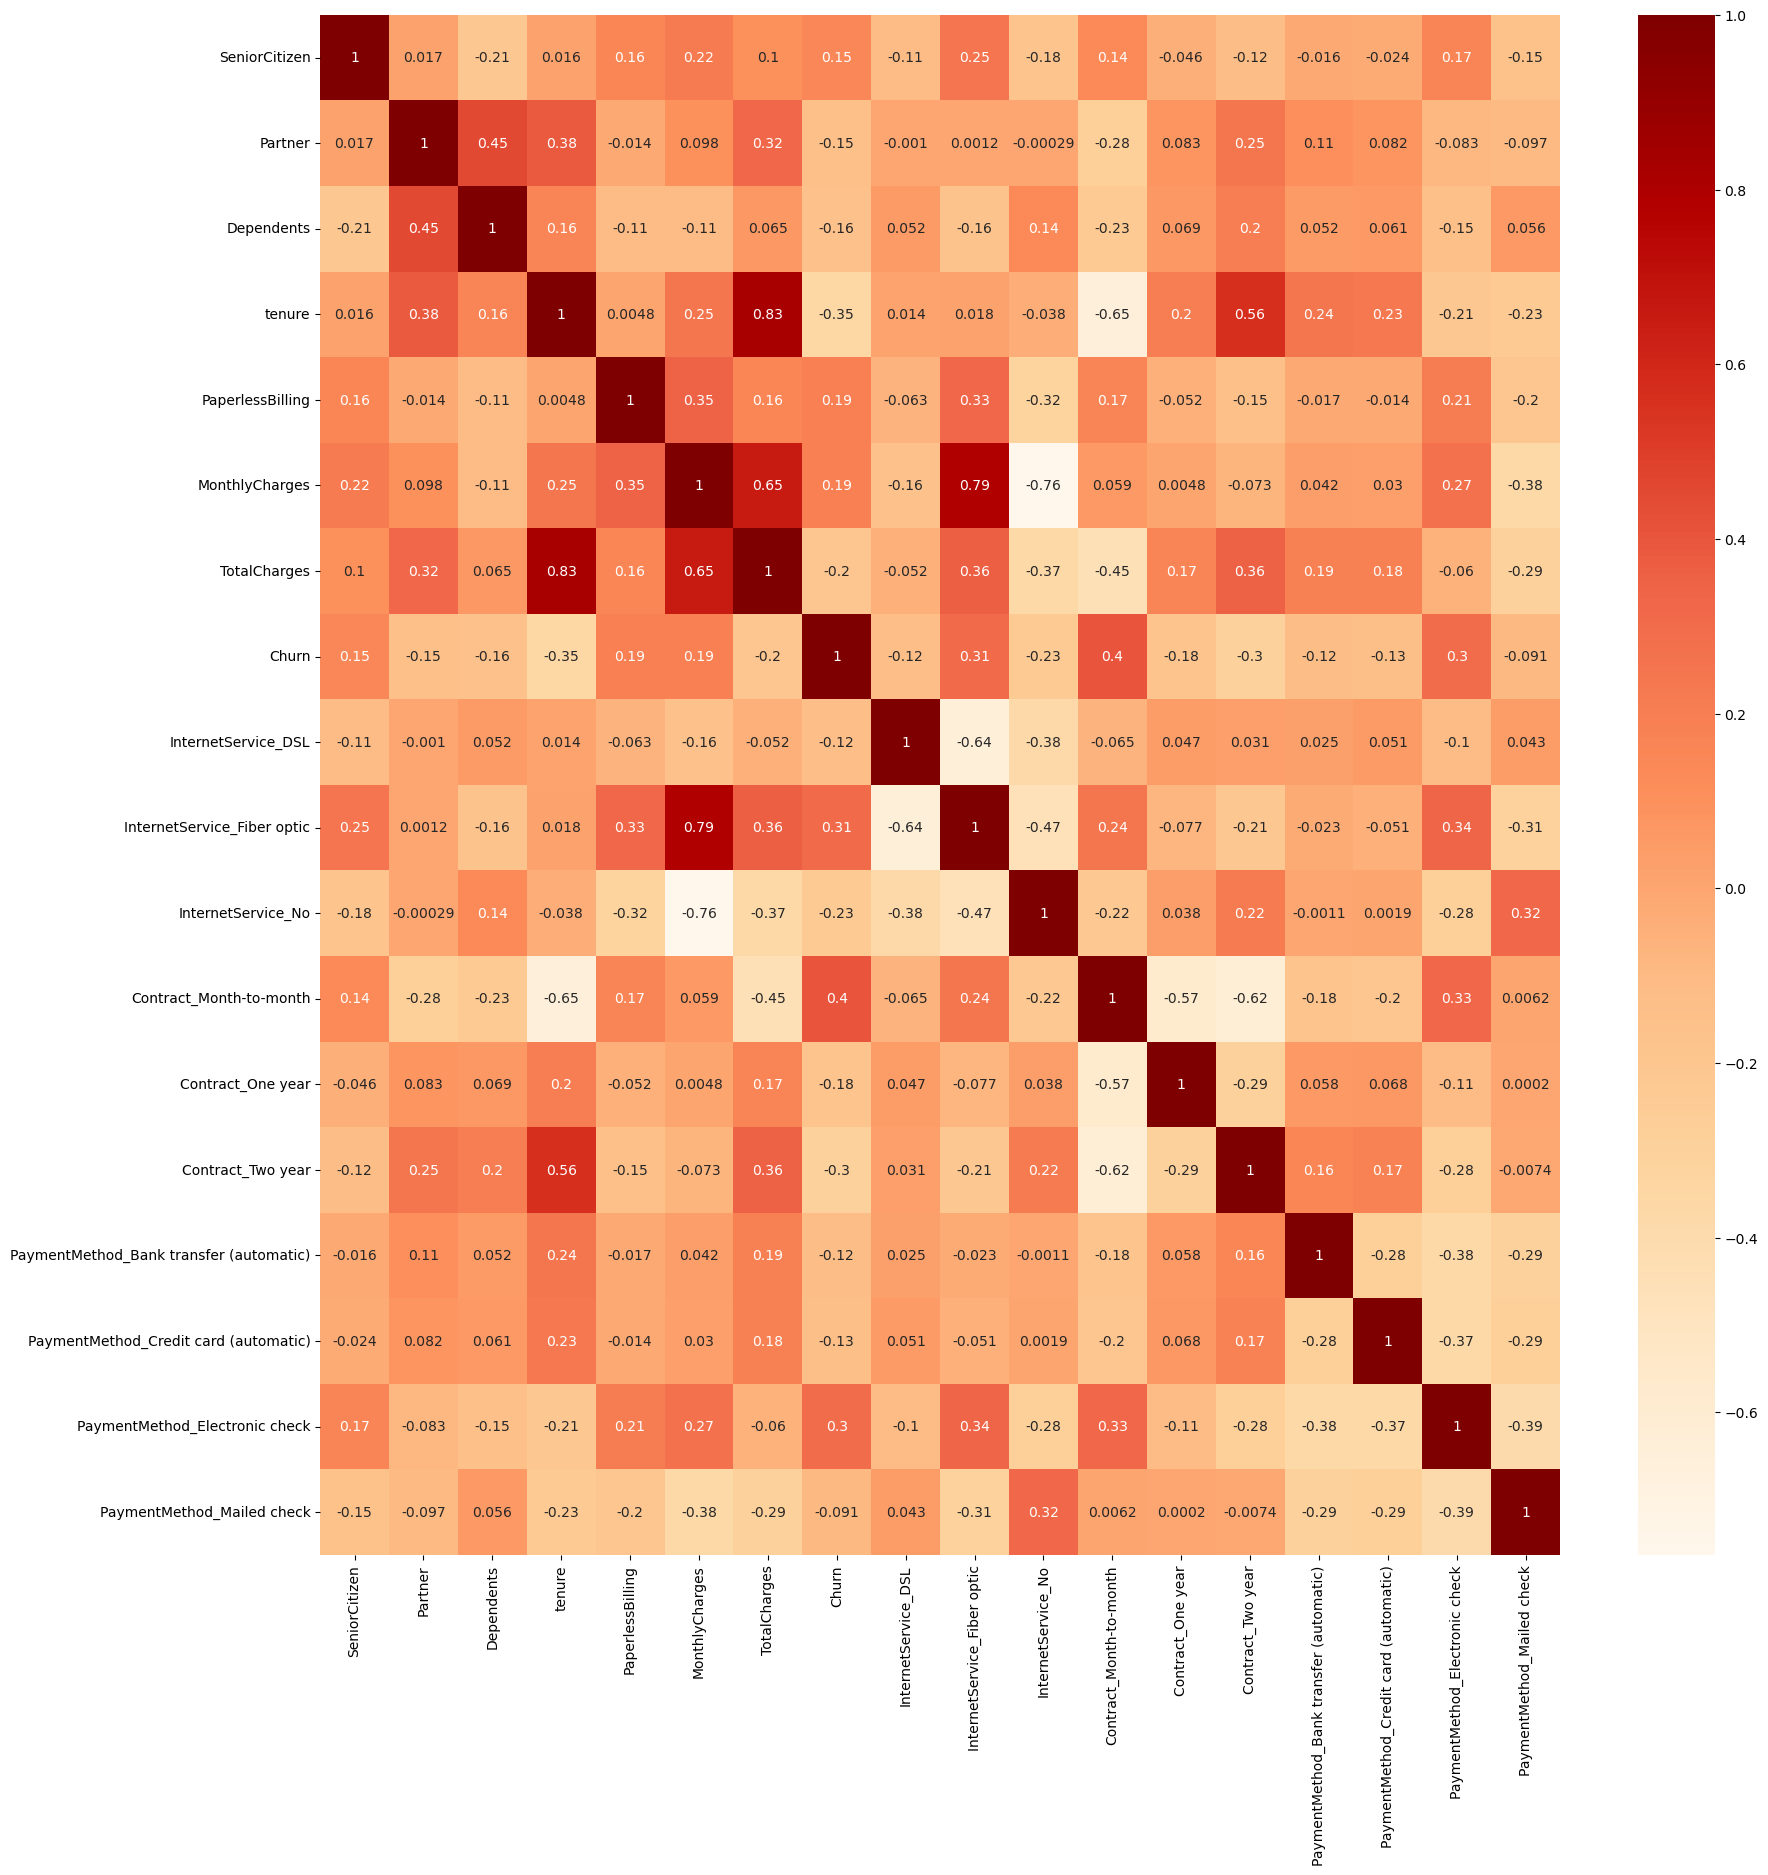

In [81]:
plt.figure(figsize=(20, 20))

custom_cmap = sns.color_palette("OrRd", as_cmap=True)

sns.heatmap(df.corr(), annot=True, cmap=custom_cmap)

plt.show()


In [82]:
# The tenure ,montly & total charges will be removed as they are correlated with other features
df.drop(['tenure','TotalCharges','MonthlyCharges'],axis=1,inplace=True)


In [83]:
df.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0


**Now our data is ready for the Machine Learning Models**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can use other algorithms as well)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1033
           1       0.54      0.48      0.51       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.74      0.75      0.75      1407



**The results of our model's performance are provided in the classification report. Here's a breakdown of the key metrics:**

**`Precision:`** Precision is the ratio of correctly predicted positive observations (churned) to the total predicted positives. In your case, the precision for class 1 (churned) is 0.54, which means that out of all instances predicted as churned, 54% of them are actually churned customers.

**`Recall:`** Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. In your case, the recall for class 1 (churned) is 0.48, indicating that the model is capturing 48% of the actual churned customers.

**`F1-score:`** The F1-score is the weighted average of precision and recall. It takes into account both false positives and false negatives. The F1-score for class 1 is 0.51.

**`Support:`** The number of actual occurrences of the class in the specified dataset. For class 1, there are 374 actual churned customers.

**`Accuracy:`** Overall accuracy of the model is 0.75, which means that the model correctly predicts the churn or not churn class for 75% of the instances in the testing set.



**From the classification report, we can see that the model is performing better in terms of precision and recall for class 0 (not churned) compared to class 1 (churned). This indicates that the model might have a bias towards the majority class (not churned). This could be because of class imbalance, where the number of churned customers is much smaller than the non-churned ones.**

To address this imbalance and potentially improve the model's performance, we might consider techniques like:

`Resampling:` Oversample the minority class (churned) or undersample the majority class (not churned) to balance the class distribution.
    
`Weighted Models:` Use algorithms that allow you to assign different weights to classes to give more importance to the minority class.
    
`Adjusting Threshold:` Adjust the probability threshold for predicting churn to achieve a better balance between precision and recall.<br></br>
    

**We can perform oversampling using the imbalanced-learn library and adjust the probability threshold for predicting churn to achieve a better balance between precision and recall:**

In [85]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversample the minority class using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Initialize the RandomForestClassifier (you can use other algorithms as well)
model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make probability predictions on the testing data
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (churned)

# Adjust the threshold to achieve a better balance between precision and recall
threshold = 0.3  # Adjust this threshold value
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Evaluate the adjusted model's performance
classification_rep = classification_report(y_test, y_pred_adjusted)

print("Classification Report with Adjusted Threshold:\n", classification_rep)


Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.94      0.56      0.70      1033
           1       0.42      0.90      0.58       374

    accuracy                           0.65      1407
   macro avg       0.68      0.73      0.64      1407
weighted avg       0.80      0.65      0.67      1407



**It seems that adjusting the threshold has led to a trade-off between precision and recall, as expected. The classification report shows the following key metrics:**

**`Precision:`** The precision of class 1 (churned) has decreased to 0.42, indicating that out of all instances predicted as churned, only 42% of them are actually churned customers. This reduction in precision is expected when you adjust the threshold to increase recall.

**`Recall:`** The recall of class 1 has increased to 0.90, indicating that the model is now capturing 90% of the actual churned customers. This improvement in recall comes at the cost of precision.

**`F1-score:`** The F1-score for class 1 has also increased to 0.58, which is the harmonic mean of precision and recall. It reflects the balance between the two metrics.

**`Support:`** The number of actual occurrences of class 1 remains the same, with 374 actual churned customers.

**`Accuracy:`** The overall accuracy of the model has decreased to 0.65 due to the change in the threshold and the associated shift in the prediction balance.


<p style="background-color:#FF5A26 ;color :white;,font-size:15em; border-radius: 20px; text-align: center-right; padding: 20px ; display: inline-block;" >
    <b>      Thanks for checking out my notebook , Upvote this if you enjoy ! 😀</b></p>